In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../utilities')

import utilities as util
import augmentations as aug
import visualization as viz
from training_utilities import TrainingMetrics, TrainingTimer
import glob
from astropy.io import fits
from random import randint
import matplotlib.pyplot as plt

2023-12-18 15:56:21.872496: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 15:56:21.896829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 15:56:21.896871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 15:56:21.897677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 15:56:21.901610: I tensorflow/core/platform/cpu_feature_guar

In [5]:
def open_fits_with_mask(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask

def open_fits_with_mask_and_pred(filename,DR = 2**14):
    image = fits.open(filename)
    cloud = image[0].data
    mask = image[1].data
    pred = image[2].data
    del image

    # Normalize image
    cloud  = cloud / DR
    return cloud , mask, pred

In [3]:
train_images_list = glob.glob('../Results/LWIRISEG/Results/*Train*.fits')
val_images_list = glob.glob('../Results/LWIRISEG/Results/*Val*.fits')
print(len(train_images_list))
print(len(val_images_list))

200
200


In [6]:
train_fits = []
for indx in range(len(train_images_list)):
    train_fits.append(open_fits_with_mask_and_pred(filename=train_images_list[indx],DR = 1))

val_fits = []
for indx in range(len(val_images_list)):
    val_fits.append(open_fits_with_mask_and_pred(filename=val_images_list[indx],DR = 1))

In [28]:
# Process each FITS file and create histograms
histogram_data = [util.process_fits_and_create_histogram(fits_file) for fits_file in train_fits]
corr_matrix = util.compute_correlation_matrix(histogram_data)


In [21]:
the_dict = util.find_correlated_fits(corr_matrix,,val_fits)

/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


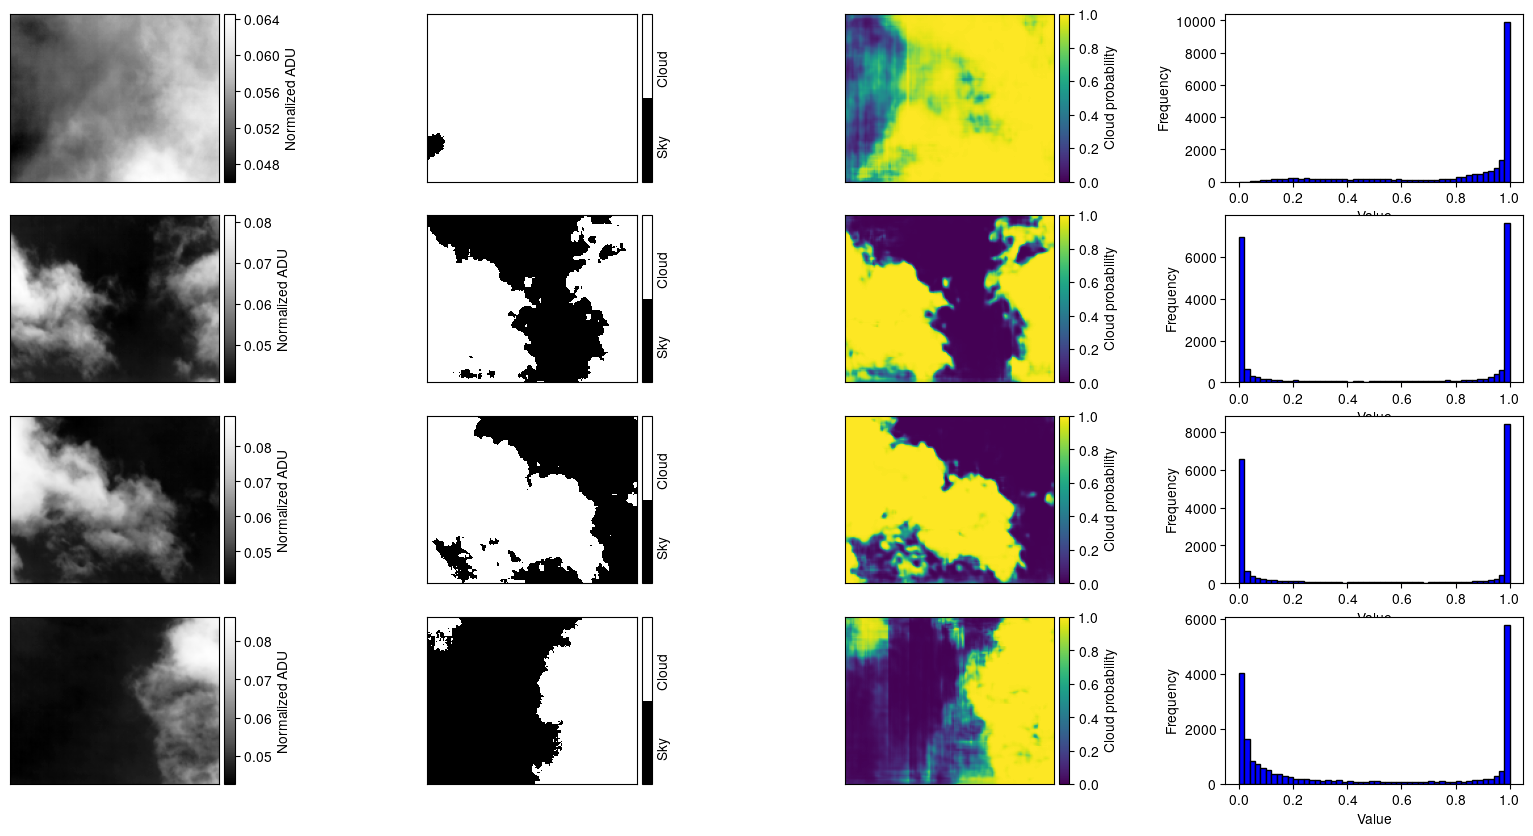

In [25]:
viz.plot_image_preds([the_dict["original"],*the_dict["least_correlated"]], figsize_per_row=(20,10), save=False)

/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


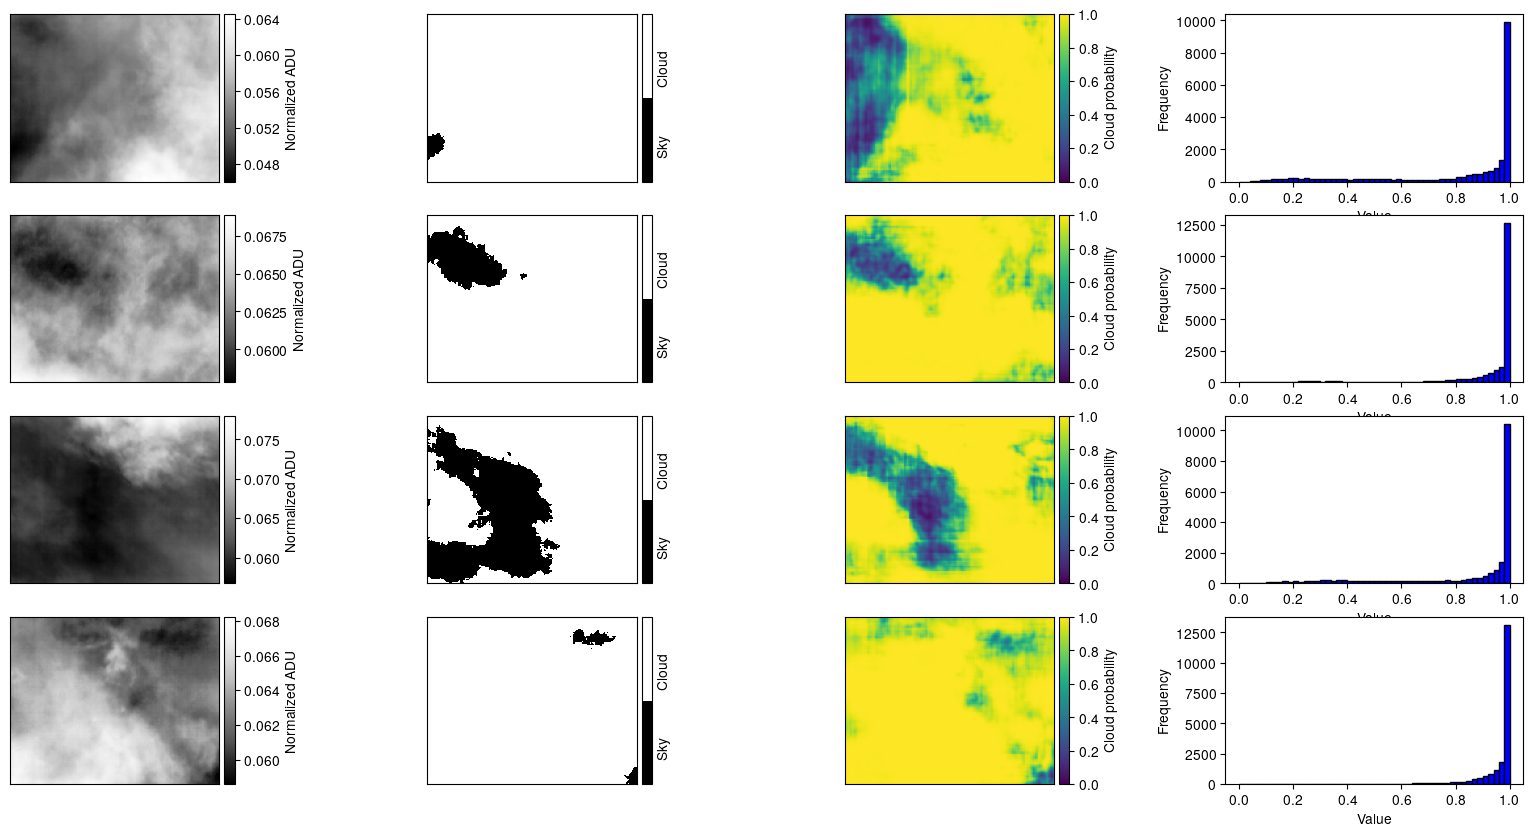

In [27]:
viz.plot_image_preds([the_dict["original"],*the_dict["most_correlated"]], figsize_per_row=(20,10), save=False)